# Analyzing Toronto Neighborhoods

#### by Sushant Deshpande

# --------Week 1--------

## SEGMENT 1 : Define a problem or an idea

A group of investors would like to open a restaurant in Toronto but aren't sure which one to open and where to open. In this project, we'll use python's web scraping to get the postal codes for Toronto’s neighborhoods, use the geographical coordinates provided to us in the last course and use FourSquare's API to get a list of nearby restaurants in a given locality.

We'll visualize the data using maps and bar charts. This will help us understand which type of restaurant is most popular in a given locality. With this information, investors can come to a decision.

## SEGMENT 2 : Describe the data

I started by getting the postal codes of Toronto from wikipedia using python's web scraping method. After that, I had to clean up the data and then merge the data with the geographical coordinate file provided to us in this course. Once I had all the postal codes with their corresponding geographical coordinates, the I leveraged the power of FourSquare to get a wealth of information.

FourSquare allowed me to get all the venues in my selected neighborhood. In this project, I only focused on East and West Toronto, but with FourSquare, the possibilities are unlimited. In the end, I had a clear picture of what is popular in which locality. With this knowledge, and investor and easily and quickly come to a decision as to where he wants to invest in in what.

# --------Week 2--------

### Still working on it...

In [111]:
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
%matplotlib inline
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
title = soup.title
text = soup.get_text()
rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

df = pd.DataFrame(list_rows)
df.head(10)

[<td align="center" style="border: 1px solid #FF0000; background-color: #FFE0E0; font-size: 135%;" width="5%"><a href="/wiki/List_of_postal_codes_of_Canada:_A" title="List of postal codes of Canada: A">A</a>
</td>, <td align="center" style="border: 1px solid #FF4000; background-color: #FFE8E0; font-size: 135%;" width="5%"><a href="/wiki/List_of_postal_codes_of_Canada:_B" title="List of postal codes of Canada: B">B</a>
</td>, <td align="center" style="border: 1px solid #FF8000; background-color: #FFF0E0; font-size: 135%;" width="5%"><a href="/wiki/List_of_postal_codes_of_Canada:_C" title="List of postal codes of Canada: C">C</a>
</td>, <td align="center" style="border: 1px solid #FFC000; background-color: #FFF8E0; font-size: 135%;" width="5%"><a href="/wiki/List_of_postal_codes_of_Canada:_E" title="List of postal codes of Canada: E">E</a>
</td>, <td align="center" style="border: 1px solid #FFFF00; background-color: #FFFFE0; font-size: 135%;" width="5%"><a href="/wiki/List_of_postal_code

0
0                                       []
1      [M1A, Not assigned, Not assigned\n]
2      [M2A, Not assigned, Not assigned\n]
3           [M3A, North York, Parkwoods\n]
4    [M4A, North York, Victoria Village\n]
5  [M5A, Downtown Toronto, Harbourfront\n]
6   [M5A, Downtown Toronto, Regent Park\n]
7    [M6A, North York, Lawrence Heights\n]
8      [M6A, North York, Lawrence Manor\n]
9      [M7A, Queen's Park, Not assigned\n]

In [3]:
df.columns = ['title']
data1 = df['title'].str.split(',', expand=True)
data1.drop(data1.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1, inplace=True)
data1.columns = ['PostalCode', 'Borough', 'Neighborhood']
data1.replace('\n','', regex=True)
data2 = data1.replace('\n]','', regex=True)
data2a = data1.PostalCode.str.replace("[", "")
data2.columns = ['PostalCode_1', 'Borough', 'Neighborhood']
data3 = pd.concat([data2a, data2], axis=1, sort=False)
data4 = data3.drop(['PostalCode_1'], axis=1)
data5 = data4.replace('Not assigned',np.nan, regex=True)
data6 = data5[pd.notnull(data5["Borough"])]
data6 = data6.reset_index(drop=True)
data6.head()

PostalCode            Borough       Neighborhood
0        M3A         North York          Parkwoods
1        M4A         North York   Victoria Village
2        M5A   Downtown Toronto       Harbourfront
3        M5A   Downtown Toronto        Regent Park
4        M6A         North York   Lawrence Heights

In [4]:
data7a = data6['Neighborhood'].fillna(data6['Borough'])
data7 = pd.DataFrame(data7a)
data6.columns = ['PostalCode', 'Borough', 'Neighborhood_1']
data8a = pd.concat([data6, data7], axis=1, sort=False)
data8b = data8a.drop(['Neighborhood_1'], axis=1)
data8 = data8b[:212]
data9a = data8.groupby('PostalCode')['Neighborhood'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data9b = data8.groupby('PostalCode')['Borough'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data9c = data9b['Borough'].str.split(', ').apply(set).str.join(', ')
data9d = pd.DataFrame(data9c)
data9d.head()
data9b.columns = ['PostalCode', 'Borough_1']
data9e = pd.concat([data9b, data9d], axis=1, sort=False)
data9f = data9e.drop(['Borough_1'], axis=1)
data9a.columns = ['PostalCode_1', 'Neighborhood']
data9g = pd.concat([data9f, data9a], axis=1, sort=False)
data9 = data9g.drop(['PostalCode_1'], axis=1)
data9.head()

PostalCode       Borough                               Neighborhood
0        M1B   Scarborough                            Rouge,  Malvern
1        M1C   Scarborough   Highland Creek,  Rouge Hill,  Port Union
2        M1E   Scarborough        Guildwood,  Morningside,  West Hill
3        M1G   Scarborough                                     Woburn
4        M1H   Scarborough                                  Cedarbrae

In [5]:
cor_df = pd.read_csv("Geospatial_Coordinates.csv")
cor_df.columns = ['PostalCode', 'Latitude', 'Longitude']
data10 = pd.merge(data9, cor_df, on=['PostalCode'])
data10[['Latitude', 'Longitude']] = data10[['Latitude', 'Longitude']].astype(float)
data10

PostalCode            Borough  \
0          M1B        Scarborough   
1          M1C        Scarborough   
2          M1E        Scarborough   
3          M1G        Scarborough   
4          M1H        Scarborough   
5          M1J        Scarborough   
6          M1K        Scarborough   
7          M1L        Scarborough   
8          M1M        Scarborough   
9          M1N        Scarborough   
10         M1P        Scarborough   
11         M1R        Scarborough   
12         M1S        Scarborough   
13         M1T        Scarborough   
14         M1V        Scarborough   
15         M1W        Scarborough   
16         M1X        Scarborough   
17         M2H         North York   
18         M2J         North York   
19         M2K         North York   
20         M2L         North York   
21         M2M         North York   
22         M2N         North York   
23         M2P         North York   
24         M2R         North York   
25         M3A         North York   
26         M3B         North York   
27         M3C         North York   
28         M3H         North York   
29         M3J         North York   
30         M3K         North York   
31         M3L         North York   
32         M3M         North York   
33         M3N         North York   
34         M4A         North York   
35         M4B          East York   
36         M4C          East York   
37         M4E       East Toronto   
38         M4G          East York   
39         M4H          East York   
40         M4J          East York   
41         M4K       East Toronto   
42         M4L       East Toronto   
43         M4M       East Toronto   
44         M4N    Central Toronto   
45         M4P    Central Toronto   
46         M4R    Central Toronto   
47         M4S    Central Toronto   
48         M4T    Central Toronto   
49         M4V    Central Toronto   
50         M4W   Downtown Toronto   
51         M4X   Downtown Toronto   
52         M4Y   Downtown Toronto   
53         M5A   Downtown Toronto   
54         M5B   Downtown Toronto   
55         M5C   Downtown Toronto   
56         M5E   Downtown Toronto   
57         M5G   Downtown Toronto   
58         M5H   Downtown Toronto   
59         M5J   Downtown Toronto   
60         M5K   Downtown Toronto   
61         M5L   Downtown Toronto   
62         M5M         North York   
63         M5N    Central Toronto   
64         M5P    Central Toronto   
65         M5R    Central Toronto   
66         M5S   Downtown Toronto   
67         M5T   Downtown Toronto   
68         M5V   Downtown Toronto   
69         M5W   Downtown Toronto   
70         M5X   Downtown Toronto   
71         M6A         North York   
72         M6B         North York   
73         M6C               York   
74         M6E               York   
75         M6G   Downtown Toronto   
76         M6H       West Toronto   
77         M6J       West Toronto   
78         M6K       West Toronto   
79         M6L         North York   
80         M6M               York   
81         M6N               York   
82         M6P       West Toronto   
83         M6R       West Toronto   
84         M6S       West Toronto   
85         M7A       Queen's Park   
86         M7R        Mississauga   
87         M7Y       East Toronto   
88         M8V          Etobicoke   
89         M8W          Etobicoke   
90         M8X          Etobicoke   
91         M8Y          Etobicoke   
92         M8Z          Etobicoke   
93         M9A          Etobicoke   
94         M9B          Etobicoke   
95         M9C          Etobicoke   
96         M9L         North York   
97         M9M         North York   
98         M9N               York   
99         M9P          Etobicoke   
100        M9R          Etobicoke   
101        M9V          Etobicoke   
102        M9W          Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                      Rouge,  Malvern  43.806686 -79.194353

In [6]:
address = 'Toronto, ON'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of', address, 'are {}, {}.'.format(latitude, longitude))

/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Toronto, ON are 43.653963, -79.387207.


In [7]:
data_west = data10[data10['Borough'].str.contains('West Toronto')].reset_index(drop=True)
data_west

PostalCode        Borough                                     Neighborhood  \
0        M6H   West Toronto                    Dovercourt Village,  Dufferin   
1        M6J   West Toronto                        Little Portugal,  Trinity   
2        M6K   West Toronto   Brockton,  Exhibition Place,  Parkdale Village   
3        M6P   West Toronto                   High Park,  The Junction South   
4        M6R   West Toronto                          Parkdale,  Roncesvalles   
5        M6S   West Toronto                              Runnymede,  Swansea   

    Latitude  Longitude  
0  43.669005 -79.442259  
1  43.647927 -79.419750  
2  43.636847 -79.428191  
3  43.661608 -79.464763  
4  43.648960 -79.456325  
5  43.651571 -79.484450

In [8]:
data_east = data10[data10['Borough'].str.contains('East Toronto')].reset_index(drop=True)
data_east

PostalCode        Borough  \
0        M4E   East Toronto   
1        M4K   East Toronto   
2        M4L   East Toronto   
3        M4M   East Toronto   
4        M7Y   East Toronto   

                                        Neighborhood   Latitude  Longitude  
0                                        The Beaches  43.676357 -79.293031  
1                      The Danforth West,  Riverdale  43.679557 -79.352188  
2                    The Beaches West,  India Bazaar  43.668999 -79.315572  
3                                    Studio District  43.659526 -79.340923  
4   Business reply mail Processing Centre969 Eastern  43.662744 -79.321558

In [9]:
# create map of Toronto using latitude and longitude values
map_west = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(data_west['Latitude'],
                                           data_west['Longitude'],
                                           data_west['Borough'],
                                           data_west['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_west)  
    
map_west

In [10]:
# create map of Toronto using latitude and longitude values
map_east = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(data_east['Latitude'],
                                           data_east['Longitude'],
                                           data_east['Borough'],
                                           data_east['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_east)  
    
map_east

In [11]:
# @hidden_cell
CLIENT_ID = 'N1AIFDAG24GJ30ZR5N4FCAPHBBMODDT2AXHDX0TT0E24ENWU' # your Foursquare ID
CLIENT_SECRET = '1LEAIIFZOAYK14YZT3SP1TA0E0EABTCWSRKGWTYYJ0SDXBWP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N1AIFDAG24GJ30ZR5N4FCAPHBBMODDT2AXHDX0TT0E24ENWU
CLIENT_SECRET:1LEAIIFZOAYK14YZT3SP1TA0E0EABTCWSRKGWTYYJ0SDXBWP


In [12]:
data_east.loc[0, 'Neighborhood']

' The Beaches'

In [13]:
data_west.loc[0, 'Neighborhood']

' Dovercourt Village,  Dufferin'

In [14]:
neighborhood_latitude_east = data_east.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude_east = data_east.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name_east = data_east.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name_east, 
                                                               neighborhood_latitude_east, 
                                                               neighborhood_longitude_east))

Latitude and longitude values of  The Beaches are 43.67635739999999, -79.2930312.


In [15]:
neighborhood_latitude_west = data_west.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude_west = data_west.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name_west = data_west.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name_west, 
                                                               neighborhood_latitude_west, 
                                                               neighborhood_longitude_west))

Latitude and longitude values of  Dovercourt Village,  Dufferin are 43.66900510000001, -79.4422593.


In [16]:
LIMIT = 100
radius = 1000

url_4s_east = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude_east, 
    neighborhood_longitude_east, 
    radius, 
    LIMIT)
url_4s_east

'https://api.foursquare.com/v2/venues/explore?&client_id=N1AIFDAG24GJ30ZR5N4FCAPHBBMODDT2AXHDX0TT0E24ENWU&client_secret=1LEAIIFZOAYK14YZT3SP1TA0E0EABTCWSRKGWTYYJ0SDXBWP&v=20180604&ll=43.67635739999999,-79.2930312&radius=1000&limit=100'

In [17]:
LIMIT = 100
radius = 1000

url_4s_west = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude_west, 
    neighborhood_longitude_west, 
    radius, 
    LIMIT)
url_4s_west

'https://api.foursquare.com/v2/venues/explore?&client_id=N1AIFDAG24GJ30ZR5N4FCAPHBBMODDT2AXHDX0TT0E24ENWU&client_secret=1LEAIIFZOAYK14YZT3SP1TA0E0EABTCWSRKGWTYYJ0SDXBWP&v=20180604&ll=43.66900510000001,-79.4422593&radius=1000&limit=100'

In [18]:
results_east = requests.get(url_4s_east).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues_east = results_east['response']['groups'][0]['items']
nearby_venues_east = json_normalize(venues_east) # flatten JSON
# filter columns
filtered_columns_east = ['venue.name',
                    'venue.categories',
                    'venue.location.lat',
                    'venue.location.lng']
nearby_venues_east =nearby_venues_east.loc[:, filtered_columns_east]
# filter the category for each row
nearby_venues_east['venue.categories'] = nearby_venues_east.apply(get_category_type, axis=1)
# clean columns
nearby_venues_east.columns = [col.split(".")[-1] for col in nearby_venues_east.columns]
nearby_venues_east

name                     categories  \
0                       Tori's Bakeshop  Vegetarian / Vegan Restaurant   
1                     Beaches Bake Shop                         Bakery   
2                       The Fox Theatre            Indie Movie Theater   
3                       Ed's Real Scoop                 Ice Cream Shop   
4                        The Beech Tree                      Gastropub   
5                        Bagels On Fire                     Bagel Shop   
6                       Mastermind Toys               Toy / Game Store   
7                          Beacher Cafe                 Breakfast Spot   
8                        Veloute Bistro              French Restaurant   
9                   The Remarkable Bean                    Coffee Shop   
10                          Kew Gardens                           Park   
11                     I'm On The Beach                          Beach   
12                     The Feathers Pub                            Pub   
13                          Yumei Sushi            Japanese Restaurant   
14                                 Xola             Mexican Restaurant   
15                          Balmy Beach                          Beach   
16                      Castro's Lounge                            Bar   
17                             Vi Vetha                 Breakfast Spot   
18                                 LCBO                   Liquor Store   
19                     The Fill Station                            Pub   
20                     Sanna's Farmacia                      Juice Bar   
21                         The Ten Spot                     Nail Salon   
22                         Sunset Grill                          Diner   
23                            DAVIDsTEA                       Tea Room   
24                Kew Gardens Play Park                           Park   
25                        Life Is Sweet                   Cupcake Shop   
26                           COBS Bread                         Bakery   
27                             Foodland                    Supermarket   
28                The Real Jerk Beaches           Caribbean Restaurant   
29                                Coles                      Bookstore   
30                        Cool Runnings           Caribbean Restaurant   
31                     The Green Dragon                            Pub   
32                          Green Basil                Thai Restaurant   
33                Outrigger Tap & Table                            Pub   
34                         Delhi Bistro              Indian Restaurant   
35                   Shoppers Drug Mart                       Pharmacy   
36                         Kyouka Ramen               Ramen Restaurant   
37                The Nutty Chocolatier                 Chocolate Shop   
38                       No Bull Burger                   Burger Joint   
39                  Pippins Tea Company                       Tea Room   
40  Beaches International Jazz Festival                      Jazz Club   
41                               Subway                 Sandwich Place   
42                              Grinder                    Coffee Shop   
43                             The Loop                            Bar   
44                  Grover Pub and Grub                            Pub   
45                       Juice and Java                           Café   
46                            Starbucks                    Coffee Shop   
47                             The Goof               Asian Restaurant   
48          Bikkuri Japanese Restaurant            Japanese Restaurant   
49                            Pizza Hut                    Pizza Place   
50                       The Beer Store                     Beer Store   
51                         Souvlaki Hut               Greek Restaurant   
52                          Tim Hortons                    Coffee Shop   
53                          Tim Hortons

In [19]:
results_west = requests.get(url_4s_west).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues_west = results_west['response']['groups'][0]['items']
nearby_venues_west = json_normalize(venues_west) # flatten JSON
# filter columns
filtered_columns_west = ['venue.name',
                    'venue.categories',
                    'venue.location.lat',
                    'venue.location.lng']
nearby_venues_west =nearby_venues_west.loc[:, filtered_columns_west]
# filter the category for each row
nearby_venues_west['venue.categories'] = nearby_venues_west.apply(get_category_type, axis=1)
# clean columns
nearby_venues_west.columns = [col.split(".")[-1] for col in nearby_venues_west.columns]
nearby_venues_west

name  \
0                                The Greater Good Bar   
1                                            Parallel   
2                              Blood Brothers Brewing   
3                     Planet Fitness Toronto Galleria   
4                             Happy Bakery & Pastries   
5                                             FreshCo   
6                                         Hale Coffee   
7                                     Nova Era Bakery   
8                             Piri-Piri Churrasqueira   
9                  Rosie Robin A Touch Of Convenience   
10                                    Tre Mari Bakery   
11                                   Wallace Espresso   
12                                      Hello Darling   
13                                      The Sovereign   
14                                          Cafe Neon   
15                                      Campbell Park   
16                                     Cafe Con Leche   
17                                       Rio 40 Graus   
18                                       King's Tacos   
19                                  Rehearsal Factory   
20                                      Pizza e Pazzi   
21                                          Thai Lime   
22                Boo Radley's Junction Bar and Grill   
23                           Boulderz Climbing Centre   
24                                    Earlscourt Park   
25                                          Starbucks   
26                            Dark Horse Espresso Bar   
27                                   Sushi California   
28                                     Canvas Gallery   
29                                       Halo Brewery   
30                            Cantanhede O Bairradino   
31                                          Dollarama   
32                                Sofra Grill Express   
33                                    Hub Coffee Shop   
34                                    TD Canada Trust   
35                                 Shoppers Drug Mart   
36                                    Sunnyside Grill   
37                                             Rexall   
38                     Earlscourt Park Off-Leash Area   
39                               Wallace Emerson Park   
40                                        Food Basics   
41                                               LCBO   
42                   Wallace Emerson Community Centre   
43                                          The Brick   
44                                             Sobeys   
45                                             Macedo   
46                                         McDonald's   
47                                     The Beer Store   
48                                      Pepper's Café   
49                                           7-Eleven   
50                                     TTC Stop #5214   
51                                      K Mini Market   
52                                   Salem Smoke Shop   
53                              Henriques Supermarket   
54                                       Paris Bakery   
55                                 Campbell Park Rink   
56                                         Nairn Park   
57                          Academy Of The Impossible   
58                                             Hawaii   
59                                              Faema   
60                              Etherea Natural Foods   
61                                      The Sovereign   
62                                 Geary Ave Parkette   
63  A Guy In A Store That Fixes Leather -Sandalman...   
64                                   Sandra's Grocery   
65                                         Koji Sushi   
66                                            Shunoko   
67                                      Pho Rang Dong   
68                                         Perth Park   
69                         BLÜ IVORY bridal & evening   

 

In [20]:
nearby_venues_west.shape

(70, 4)

In [21]:
print('East Toronto has {} venus,'.format(nearby_venues_east.shape[0]), 'and West Toronto has {} venus.'.format(nearby_venues_west.shape[0]))

East Toronto has 85 venus, and West Toronto has 70 venus.


In [22]:
def getNearbyVenues_east(names, latitudes, longitudes, radius=1000):
    
    venues_list_east=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        url_4s1_east = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        results_east = requests.get(url_4s1_east).json()["response"]['groups'][0]['items']

        venues_list_east.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_east])

    nearby_venues_east = pd.DataFrame([item for venues_list_east in venues_list_east for item in venues_list_east])
    nearby_venues_east.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_east)

In [23]:
def getNearbyVenues_west(names, latitudes, longitudes, radius=1000):
    
    venues_list_west=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        url_4s1_west = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        results_west = requests.get(url_4s1_west).json()["response"]['groups'][0]['items']

        venues_list_west.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_west])

    nearby_venues_west = pd.DataFrame([item for venues_list_west in venues_list_west for item in venues_list_west])
    nearby_venues_west.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_west)

In [24]:
toronto_venues_east = getNearbyVenues_east(names=data_east['Neighborhood'],
                                   latitudes=data_east['Latitude'],
                                   longitudes=data_east['Longitude']
                                  )

 The Beaches
 The Danforth West,  Riverdale
 The Beaches West,  India Bazaar
 Studio District
 Business reply mail Processing Centre969 Eastern


In [25]:
toronto_venues_west = getNearbyVenues_west(names=data_west['Neighborhood'],
                                   latitudes=data_west['Latitude'],
                                   longitudes=data_west['Longitude']
                                  )

 Dovercourt Village,  Dufferin
 Little Portugal,  Trinity
 Brockton,  Exhibition Place,  Parkdale Village
 High Park,  The Junction South
 Parkdale,  Roncesvalles
 Runnymede,  Swansea


In [26]:
toronto_venues_east

Neighborhood  Neighborhood Latitude  \
0                                          The Beaches              43.676357   
1                                          The Beaches              43.676357   
2                                          The Beaches              43.676357   
3                                          The Beaches              43.676357   
4                                          The Beaches              43.676357   
5                                          The Beaches              43.676357   
6                                          The Beaches              43.676357   
7                                          The Beaches              43.676357   
8                                          The Beaches              43.676357   
9                                          The Beaches              43.676357   
10                                         The Beaches              43.676357   
11                                         The Beaches              43.676357   
12                                         The Beaches              43.676357   
13                                         The Beaches              43.676357   
14                                         The Beaches              43.676357   
15                                         The Beaches              43.676357   
16                                         The Beaches              43.676357   
17                                         The Beaches              43.676357   
18                                         The Beaches              43.676357   
19                                         The Beaches              43.676357   
20                                         The Beaches              43.676357   
21                                         The Beaches              43.676357   
22                                         The Beaches              43.676357   
23                                         The Beaches              43.676357   
24                                         The Beaches              43.676357   
25                                         The Beaches              43.676357   
26                                         The Beaches              43.676357   
27                                         The Beaches              43.676357   
28                                         The Beaches              43.676357   
29                                         The Beaches              43.676357   
30                                         The Beaches              43.676357   
31                                         The Beaches              43.676357   
32                                         The Beaches              43.676357   
33                                         The Beaches              43.676357   
34                                         The Beaches              43.676357   
35                                         The Beaches              43.676357   
36                                         The Beaches              43.676357   
37                                         The Beaches              43.676357   
38                                         The Beaches              43.676357   
39                                         The Beaches              43.676357   
40                                         The Beaches              43.676357   
41                                         The Beaches              43.676357   
42                                         The Beaches              43.676357   
43                                         The Beaches              43.676357   
44                                         The Beaches              43.676357   
45                                         The Beaches              43.676357   
46                                         The Beaches              43.676357   
47                                         The Beaches              43.676357   
48                                         The Beaches              43.67

In [27]:
toronto_venues_west

Neighborhood  Neighborhood Latitude  \
0                      Dovercourt Village,  Dufferin              43.669005   
1                      Dovercourt Village,  Dufferin              43.669005   
2                      Dovercourt Village,  Dufferin              43.669005   
3                      Dovercourt Village,  Dufferin              43.669005   
4                      Dovercourt Village,  Dufferin              43.669005   
5                      Dovercourt Village,  Dufferin              43.669005   
6                      Dovercourt Village,  Dufferin              43.669005   
7                      Dovercourt Village,  Dufferin              43.669005   
8                      Dovercourt Village,  Dufferin              43.669005   
9                      Dovercourt Village,  Dufferin              43.669005   
10                     Dovercourt Village,  Dufferin              43.669005   
11                     Dovercourt Village,  Dufferin              43.669005   
12                     Dovercourt Village,  Dufferin              43.669005   
13                     Dovercourt Village,  Dufferin              43.669005   
14                     Dovercourt Village,  Dufferin              43.669005   
15                     Dovercourt Village,  Dufferin              43.669005   
16                     Dovercourt Village,  Dufferin              43.669005   
17                     Dovercourt Village,  Dufferin              43.669005   
18                     Dovercourt Village,  Dufferin              43.669005   
19                     Dovercourt Village,  Dufferin              43.669005   
20                     Dovercourt Village,  Dufferin              43.669005   
21                     Dovercourt Village,  Dufferin              43.669005   
22                     Dovercourt Village,  Dufferin              43.669005   
23                     Dovercourt Village,  Dufferin              43.669005   
24                     Dovercourt Village,  Dufferin              43.669005   
25                     Dovercourt Village,  Dufferin              43.669005   
26                     Dovercourt Village,  Dufferin              43.669005   
27                     Dovercourt Village,  Dufferin              43.669005   
28                     Dovercourt Village,  Dufferin              43.669005   
29                     Dovercourt Village,  Dufferin              43.669005   
30                     Dovercourt Village,  Dufferin              43.669005   
31                     Dovercourt Village,  Dufferin              43.669005   
32                     Dovercourt Village,  Dufferin              43.669005   
33                     Dovercourt Village,  Dufferin              43.669005   
34                     Dovercourt Village,  Dufferin              43.669005   
35                     Dovercourt Village,  Dufferin              43.669005   
36                     Dovercourt Village,  Dufferin              43.669005   
37                     Dovercourt Village,  Dufferin              43.669005   
38                     Dovercourt Village,  Dufferin              43.669005   
39                     Dovercourt Village,  Dufferin              43.669005   
40                     Dovercourt Village,  Dufferin              43.669005   
41                     Dovercourt Village,  Dufferin              43.669005   
42                     Dovercourt Village,  Dufferin              43.669005   
43                     Dovercourt Village,  Dufferin              43.669005   
44                     Dovercourt Village,  Dufferin              43.669005   
45                     Dovercourt Village,  Dufferin              43.669005   
46                     Dovercourt Village,  Dufferin              43.669005   
47                     Dovercourt Village,  Dufferin              43.669005   
48                     Dovercourt Village,  Dufferin              43.669005   
49                     Dovercourt Village,  Dufferin              43.669005   
50         

In [28]:
toronto_venues_east.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(toronto_venues_east['Venue Category'].unique())))

There are 133 uniques categories.


In [29]:
toronto_venues_west.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(toronto_venues_west['Venue Category'].unique())))

There are 162 uniques categories.


In [30]:
# one hot encoding
toronto_onehot_east = pd.get_dummies(toronto_venues_east[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot_east['Neighborhood'] = toronto_venues_east['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns_east = [toronto_onehot_east.columns[-1]] + list(toronto_onehot_east.columns[:-1])
toronto_onehot_east = toronto_onehot_east[fixed_columns_east]

toronto_onehot_east

Yoga Studio  American Restaurant  Antique Shop  Art Gallery  \
0              0                    0             0            0   
1              0                    0             0            0   
2              0                    0             0            0   
3              0                    0             0            0   
4              0                    0             0            0   
5              0                    0             0            0   
6              0                    0             0            0   
7              0                    0             0            0   
8              0                    0             0            0   
9              0                    0             0            0   
10             0                    0             0            0   
11             0                    0             0            0   
12             0                    0             0            0   
13             0                    0             0            0   
14             0                    0             0            0   
15             0                    0             0            0   
16             0                    0             0            0   
17             0                    0             0            0   
18             0                    0             0            0   
19             0                    0             0            0   
20             0                    0             0            0   
21             0                    0             0            0   
22             0                    0             0            0   
23             0                    0             0            0   
24             0                    0             0            0   
25             0                    0             0            0   
26             0                    0             0            0   
27             0                    0             0            0   
28             0                    0             0            0   
29             0                    0             0            0   
30             0                    0             0            0   
31             0                    0             0            0   
32             0                    0             0            0   
33             0                    0             0            0   
34             0                    0             0            0   
35             0                    0             0            0   
36             0                    0             0            0   
37             0                    0             0            0   
38             0                    0             0            0   
39             0                    0             0            0   
40             0                    0             0            0   
41             0                    0             0            0   
42             0                    0             0            0   
43             0                    0             0            0   
44             0                    0             0            0   
45             0                    0             0            0   
46             0                    0             0            0   
47             0                    0             0            0   
48             0                    0             0            0   
49             0                    0             0            0   
50             0                    0             0            0   
51             0                    0             0            0   
52             0                    0             0            0   
53             0                    0             0            0   
54             0                    0             0            0   
55             0                    0             0            0   
56             0                    0             0            0   
57             0                    0             0          

In [31]:
# one hot encoding
toronto_onehot_west = pd.get_dummies(toronto_venues_west[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot_west['Neighborhood'] = toronto_venues_west['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns_west = [toronto_onehot_west.columns[-1]] + list(toronto_onehot_west.columns[:-1])
toronto_onehot_west = toronto_onehot_west[fixed_columns_west]

toronto_onehot_west

Zoo  Accessories Store  American Restaurant  Amphitheater  Antique Shop  \
0      0                  0                    0             0             0   
1      0                  0                    0             0             0   
2      0                  0                    0             0             0   
3      0                  0                    0             0             0   
4      0                  0                    0             0             0   
5      0                  0                    0             0             0   
6      0                  0                    0             0             0   
7      0                  0                    0             0             0   
8      0                  0                    0             0             0   
9      0                  0                    0             0             0   
10     0                  0                    0             0             0   
11     0                  0                    0             0             0   
12     0                  0                    0             0             0   
13     0                  0                    0             0             0   
14     0                  0                    0             0             0   
15     0                  0                    0             0             0   
16     0                  0                    0             0             0   
17     0                  0                    0             0             0   
18     0                  0                    0             0             0   
19     0                  0                    0             0             0   
20     0                  0                    0             0             0   
21     0                  0                    0             0             0   
22     0                  0                    0             0             0   
23     0                  0                    0             0             0   
24     0                  0                    0             0             0   
25     0                  0                    0             0             0   
26     0                  0                    0             0             0   
27     0                  0                    0             0             0   
28     0                  0                    0             0             0   
29     0                  0                    0             0             0   
30     0                  0                    0             0             0   
31     0                  0                    0             0             0   
32     0                  0                    0             0             0   
33     0                  0                    0             0             0   
34     0                  0                    0             0             0   
35     0                  0                    0             0             0   
36     0                  0                    0             0             0   
37     0                  0                    0             0             0   
38     0                  0                    0             0             0   
39     0                  0                    0             0             0   
40     0                  0                    0             0             0   
41     0                  0                    0             0             0   
42     0                  0                    0             0             0   
43     0                  0                    0             0             0   
44     0                  0                    0             0             0   
45     0                  0                    0             0             0   
46     0                  0                    0             0             0   
47     0                  0                    0             0             0   
48     0                  0                    0             0             0   
49   

In [32]:
toronto_grouped_east = toronto_onehot_east.groupby('Neighborhood').mean().reset_index()
num_top_venues_east = 5

for hood in toronto_grouped_east['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped_east[toronto_grouped_east['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues_east))
    print('\n')

---- Business reply mail Processing Centre969 Eastern----
                venue  freq
0                Park  0.11
1         Coffee Shop  0.09
2         Pizza Place  0.06
3  Italian Restaurant  0.04
4       Burrito Place  0.04


---- Studio District----
                 venue  freq
0          Coffee Shop  0.07
1                  Bar  0.06
2               Bakery  0.05
3  American Restaurant  0.05
4                 Café  0.05


---- The Beaches----
            venue  freq
0     Coffee Shop  0.08
1             Pub  0.07
2     Pizza Place  0.06
3          Bakery  0.04
4  Breakfast Spot  0.04


---- The Beaches West,  India Bazaar----
               venue  freq
0  Indian Restaurant  0.09
1        Coffee Shop  0.05
2              Beach  0.04
3     Sandwich Place  0.04
4               Café  0.04


---- The Danforth West,  Riverdale----
                  venue  freq
0      Greek Restaurant  0.13
1           Coffee Shop  0.07
2                   Pub  0.05
3                  Café  0.05
4  Fast Fo

In [33]:
toronto_grouped_west = toronto_onehot_west.groupby('Neighborhood').mean().reset_index()
num_top_venues_west = 5

for hood in toronto_grouped_west['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped_west[toronto_grouped_west['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues_west))
    print('\n')

---- Brockton,  Exhibition Place,  Parkdale Village----
                    venue  freq
0                    Café  0.07
1             Coffee Shop  0.05
2              Restaurant  0.04
3                     Bar  0.04
4  Furniture / Home Store  0.03


---- Dovercourt Village,  Dufferin----
         venue  freq
0         Café  0.10
1         Park  0.07
2  Coffee Shop  0.07
3  Supermarket  0.04
4       Bakery  0.04


---- High Park,  The Junction South----
                venue  freq
0                 Bar  0.09
1                Café  0.08
2         Coffee Shop  0.06
3   Convenience Store  0.04
4  Italian Restaurant  0.04


---- Little Portugal,  Trinity----
          venue  freq
0          Café  0.08
1           Bar  0.08
2    Restaurant  0.05
3        Bakery  0.05
4  Cocktail Bar  0.04


---- Parkdale,  Roncesvalles----
            venue  freq
0     Coffee Shop  0.05
1             Bar  0.05
2            Café  0.04
3  Breakfast Spot  0.04
4     Pizza Place  0.04


---- Runnymede,  Swansea-

In [34]:
def return_most_common_venues_east(row, num_top_venues_east):
    row_categories_east = row.iloc[1:]
    row_categories_sorted_east = row_categories_east.sort_values(ascending=False)
    
    return row_categories_sorted_east.index.values[0:num_top_venues_east]

In [35]:
def return_most_common_venues_west(row, num_top_venues_west):
    row_categories_west = row.iloc[1:]
    row_categories_sorted_west = row_categories_west.sort_values(ascending=False)
    
    return row_categories_sorted_west.index.values[0:num_top_venues_west]

In [36]:
num_top_venues_east = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues_east):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_east = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_east['Neighborhood'] = toronto_grouped_east['Neighborhood']

for ind in np.arange(toronto_grouped_east.shape[0]):
    neighborhoods_venues_sorted_east.iloc[ind, 1:] = return_most_common_venues_east(toronto_grouped_east.iloc[ind, :], num_top_venues_east)

neighborhoods_venues_sorted_east

Neighborhood 1st Most Common Venue  \
0   Business reply mail Processing Centre969 Eastern                  Park   
1                                    Studio District           Coffee Shop   
2                                        The Beaches           Coffee Shop   
3                    The Beaches West,  India Bazaar     Indian Restaurant   
4                      The Danforth West,  Riverdale      Greek Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop           Pizza Place      Sushi Restaurant   
1                   Bar                  Café                Bakery   
2                   Pub           Pizza Place        Breakfast Spot   
3           Coffee Shop        Sandwich Place                 Beach   
4           Coffee Shop                   Pub                  Café   

  5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
0    Italian Restaurant         Burrito Place                Brewery   
1   American Restaurant    Italian Restaurant  Vietnamese Restaurant   
2                 Beach   Japanese Restaurant                    Bar   
3                  Café                Bakery     Italian Restaurant   
4  Fast Food Restaurant           Pizza Place         Ice Cream Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0       Thai Restaurant        Breakfast Spot             Comic Shop  
1                 Diner               Brewery         Sandwich Place  
2                Bakery          Burger Joint      Indian Restaurant  
3         Burrito Place                   Spa             Restaurant  
4                   Spa        Sandwich Place                  Diner

In [37]:
num_top_venues_west = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues_west):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_west = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_west['Neighborhood'] = toronto_grouped_west['Neighborhood']

for ind in np.arange(toronto_grouped_west.shape[0]):
    neighborhoods_venues_sorted_west.iloc[ind, 1:] = return_most_common_venues_west(toronto_grouped_west.iloc[ind, :], num_top_venues_west)

neighborhoods_venues_sorted_west

Neighborhood 1st Most Common Venue  \
0   Brockton,  Exhibition Place,  Parkdale Village                  Café   
1                    Dovercourt Village,  Dufferin                  Café   
2                   High Park,  The Junction South                   Bar   
3                        Little Portugal,  Trinity                   Bar   
4                          Parkdale,  Roncesvalles                   Bar   
5                              Runnymede,  Swansea           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop            Restaurant                   Bar   
1                  Park           Coffee Shop           Supermarket   
2                  Café           Coffee Shop    Italian Restaurant   
3                  Café            Restaurant                Bakery   
4           Coffee Shop      Sushi Restaurant        Breakfast Spot   
5                  Café                Bakery           Pizza Place   

    5th Most Common Venue          6th Most Common Venue  \
0  Furniture / Home Store  Vegetarian / Vegan Restaurant   
1        Sushi Restaurant                            Bar   
2       Convenience Store                Thai Restaurant   
3             Coffee Shop                   Cocktail Bar   
4             Pizza Place                           Café   
5      Italian Restaurant                           Park   

  7th Most Common Venue 8th Most Common Venue        9th Most Common Venue  \
0                Bakery        Soccer Stadium               Sandwich Place   
1                Bakery        Breakfast Spot            Convenience Store   
2        Sandwich Place      Sushi Restaurant                 Antique Shop   
3           Men's Store    Italian Restaurant                  Pizza Place   
4       Thai Restaurant                   Gym  Eastern European Restaurant   
5                   Pub                   Spa                    Gastropub   

          10th Most Common Venue  
0                      Gift Shop  
1                       Pharmacy  
2                         Bakery  
3  Vegetarian / Vegan Restaurant  
4                         Bakery  
5                          Diner

In [38]:
kclusters = 5

toronto_grouped_clustering_east = toronto_grouped_east.drop('Neighborhood', 1)

kmeans_east = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering_east)

kmeans_east.labels_[0:10]

array([3, 2, 1, 4, 0], dtype=int32)

In [39]:
kclusters = 5

toronto_grouped_clustering_west = toronto_grouped_west.drop('Neighborhood', 1)

kmeans_west = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering_west)

kmeans_west.labels_[0:10]

array([1, 3, 4, 1, 0, 2], dtype=int32)

In [52]:
toronto_merged_east = data_east

toronto_merged_east['Cluster Labels'] = kmeans_east.labels_

toronto_merged_east = toronto_merged_east.join(neighborhoods_venues_sorted_east.set_index('Neighborhood'), on='Neighborhood')

toronto_merged_east.head()

PostalCode        Borough  \
0        M4E   East Toronto   
1        M4K   East Toronto   
2        M4L   East Toronto   
3        M4M   East Toronto   
4        M7Y   East Toronto   

                                        Neighborhood   Latitude  Longitude  \
0                                        The Beaches  43.676357 -79.293031   
1                      The Danforth West,  Riverdale  43.679557 -79.352188   
2                    The Beaches West,  India Bazaar  43.668999 -79.315572   
3                                    Studio District  43.659526 -79.340923   
4   Business reply mail Processing Centre969 Eastern  43.662744 -79.321558   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               3           Coffee Shop                   Pub   
1               2      Greek Restaurant           Coffee Shop   
2               1     Indian Restaurant           Coffee Shop   
3               4           Coffee Shop                   Bar   
4               0                  Park           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place        Breakfast Spot                 Beach   
1                   Pub                  Café  Fast Food Restaurant   
2        Sandwich Place                 Beach                  Café   
3                  Café                Bakery   American Restaurant   
4           Pizza Place      Sushi Restaurant    Italian Restaurant   

  6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
0   Japanese Restaurant                    Bar                Bakery   
1           Pizza Place         Ice Cream Shop                   Spa   
2                Bakery     Italian Restaurant         Burrito Place   
3    Italian Restaurant  Vietnamese Restaurant                 Diner   
4         Burrito Place                Brewery       Thai Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0          Burger Joint      Indian Restaurant  
1        Sandwich Place                  Diner  
2                   Spa             Restaurant  
3               Brewery         Sandwich Place  
4        Breakfast Spot             Comic Shop

In [53]:
toronto_merged_west = data_west

toronto_merged_west['Cluster Labels'] = kmeans_west.labels_

toronto_merged_west = toronto_merged_west.join(neighborhoods_venues_sorted_west.set_index('Neighborhood'), on='Neighborhood')

toronto_merged_west.head()

PostalCode        Borough                                     Neighborhood  \
0        M6H   West Toronto                    Dovercourt Village,  Dufferin   
1        M6J   West Toronto                        Little Portugal,  Trinity   
2        M6K   West Toronto   Brockton,  Exhibition Place,  Parkdale Village   
3        M6P   West Toronto                   High Park,  The Junction South   
4        M6R   West Toronto                          Parkdale,  Roncesvalles   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  43.669005 -79.442259               1                  Café   
1  43.647927 -79.419750               3                   Bar   
2  43.636847 -79.428191               4                  Café   
3  43.661608 -79.464763               1                   Bar   
4  43.648960 -79.456325               0                   Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Park           Coffee Shop           Supermarket   
1                  Café            Restaurant                Bakery   
2           Coffee Shop            Restaurant                   Bar   
3                  Café           Coffee Shop    Italian Restaurant   
4           Coffee Shop      Sushi Restaurant        Breakfast Spot   

    5th Most Common Venue          6th Most Common Venue  \
0        Sushi Restaurant                            Bar   
1             Coffee Shop                   Cocktail Bar   
2  Furniture / Home Store  Vegetarian / Vegan Restaurant   
3       Convenience Store                Thai Restaurant   
4             Pizza Place                           Café   

  7th Most Common Venue 8th Most Common Venue        9th Most Common Venue  \
0                Bakery        Breakfast Spot            Convenience Store   
1           Men's Store    Italian Restaurant                  Pizza Place   
2                Bakery        Soccer Stadium               Sandwich Place   
3        Sandwich Place      Sushi Restaurant                 Antique Shop   
4       Thai Restaurant                   Gym  Eastern European Restaurant   

          10th Most Common Venue  
0                       Pharmacy  
1  Vegetarian / Vegan Restaurant  
2                      Gift Shop  
3                         Bakery  
4                         Bakery

In [42]:
map_clusters_east = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_east['Latitude'],
                                  toronto_merged_east['Longitude'],
                                  toronto_merged_east['Neighborhood'],
                                  toronto_merged_east['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_east)
       
map_clusters_east

In [43]:
map_clusters_west = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_west['Latitude'],
                                  toronto_merged_west['Longitude'],
                                  toronto_merged_west['Neighborhood'],
                                  toronto_merged_west['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_west)
       
map_clusters_west

In [71]:
toronto_east_group = toronto_venues_east.groupby('Venue Category').count()
print('There are {} uniques categories.'.format(len(toronto_venues_east['Venue Category'].unique())))

There are 133 uniques categories.


In [63]:
toronto_west_group = toronto_venues_west.groupby('Venue Category').count()
print('There are {} uniques categories.'.format(len(toronto_venues_west['Venue Category'].unique())))

There are 162 uniques categories.


In [103]:
toronto_east_group.sort_values(by='Neighborhood', ascending=True, inplace=True)

df_top10_east = toronto_east_group['Neighborhood'].tail(10)
df_top10_east

Venue Category
Indian Restaurant     10
Italian Restaurant    10
Bar                   11
Park                  12
Pub                   13
Bakery                13
Pizza Place           13
Greek Restaurant      14
Café                  14
Coffee Shop           29
Name: Neighborhood, dtype: int64

In [104]:
toronto_west_group.sort_values(by='Neighborhood', ascending=True, inplace=True)

df_top10_west = toronto_west_group['Neighborhood'].tail(10)
df_top10_west

Venue Category
Breakfast Spot        10
Sushi Restaurant      12
Park                  12
Restaurant            13
Pizza Place           13
Italian Restaurant    14
Bakery                21
Bar                   30
Coffee Shop           33
Café                  41
Name: Neighborhood, dtype: int64

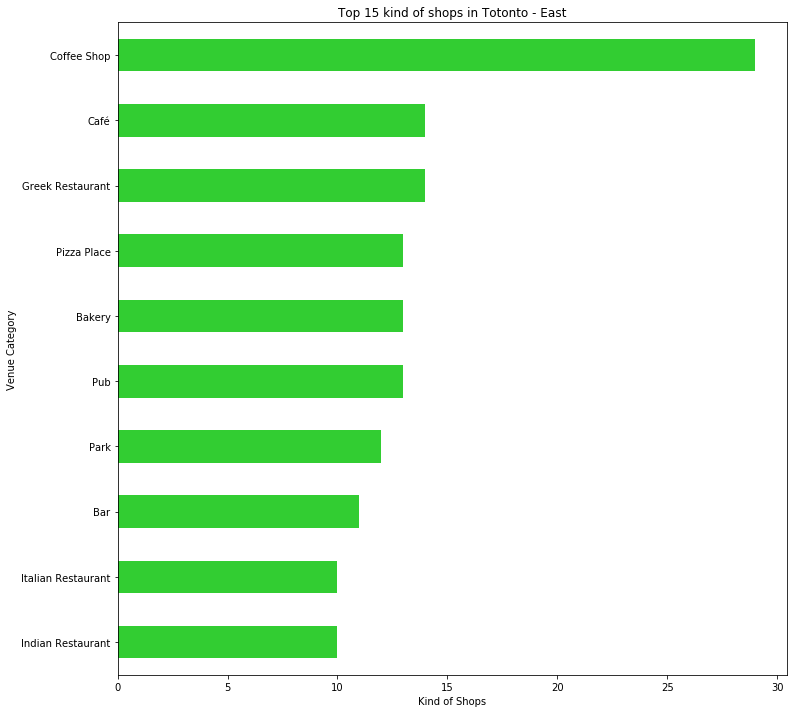

In [105]:
df_top10_east.plot(kind='barh', figsize=(12, 12), color='limegreen')
plt.xlabel('Kind of Shops')
plt.title('Top 15 kind of shops in Totonto - East')

plt.show()

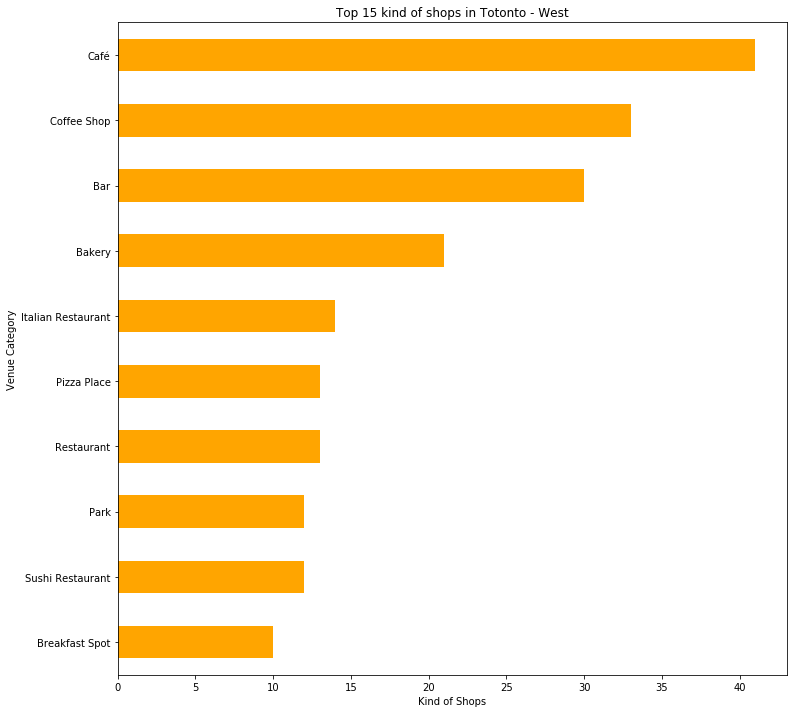

In [113]:
df_top10_west.plot(kind='barh', figsize=(12, 12), color='orange')
plt.xlabel('Kind of Shops')
plt.title('Top 15 kind of shops in Totonto - West')

plt.show()